In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np



mnist_train = torchvision.datasets.MNIST(root="MNIST_data/", train=True, transform=torchvision.transforms.ToTensor(), download=True)
mnist_test = torchvision.datasets.MNIST(root="MNIST_data/", train=False, transform=torchvision.transforms.ToTensor(), download=True)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


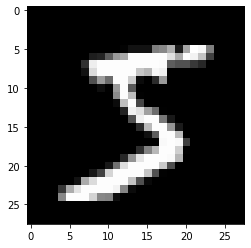

In [ ]:
#시각화
import matplotlib.pyplot as plt
train0 = mnist_train.train_data[0].numpy() # tensor --> numpy로 바꿀 떄는 이렇게 
plt.imshow(train0, cmap = "gray") # 그림을 보여주기 위해서는 plt를 사용하고, imshow 메서드를 사용한다.

In [ ]:
train_data = mnist_train.train_data.reshape(-1,28 * 28)
test_data = mnist_test.test_data.reshape(-1, 28* 28)

x_train, y_train =  train_data.data, mnist_train.train_labels
x_test, y_test = test_data.data, mnist_test.test_labels



print("x_train.shpae= {} , y_train.shape = {}".format(x_train.shape, y_train.shape))
print("x_test.shpae= {} , y_test.shape = {}".format(x_test.shape, y_test.shape))


x_train.shpae= torch.Size([60000, 784]) , y_train.shape = torch.Size([60000])
x_test.shpae= torch.Size([10000, 784]) , y_test.shape = torch.Size([10000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Xavier initalization 방법을 통해서 가중치를 초기화합니다.

In [ ]:
import math
# neural net에서 입력값은 한 데이터의 모든 feature들인가? 아니면 모든 데이터들을 다 포괄하는 영역인가?
# feautre의 개수만큼 들어간다. 
# weight의 크기가 784 * 10인 이유는 784개의 feature들을 커버하고, 이들을 통해 0~9까지의 숫자를 나타내기 떄문

weights = torch.randn(784,10) / math.sqrt(784) # hidden layer의 node 개수가 10개임을 의미한다.
weights.requires_grad_()
bias = torch.zeros(10, requires_grad= True)

weights.shape

torch.Size([784, 10])

In [ ]:
# customized된 손실함수
def log_softmax(x):
  return x - x.exp().sum(-1).log().unsqeeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)


In [ ]:
#손실함수로 음의 로그우도 함수를 정의
def nll(input, target):
    return -input[range(target.shape[0]), target].mean().long()

loss_func = nll

In [ ]:

batch_size = 64

xb = x_train[0:batch_size]
preds = model(xb)

print(preds[0], preds.shape)

RuntimeError: ignored